In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
X = np.load("data/X_scaled.npy")
y = np.load("data/y.npy")


In [3]:
X_benign = X[y == 0]  # BENIGN = 0 from earlier
print("Training samples (BENIGN only):", X_benign.shape[0])


Training samples (BENIGN only): 288544


In [4]:
iso_model = IsolationForest(
    n_estimators=100,
    contamination=0.02,  # Expected outliers
    random_state=42
)

iso_model.fit(X_benign)


IsolationForest(contamination=0.02, random_state=42)

In [5]:
y_iso_pred = iso_model.predict(X)
# Convert to binary: 1 (BENIGN), 0 (ANOMALY)
y_iso_pred = np.where(y_iso_pred == 1, 0, 1)


Classification Report (Unsupervised vs True Labels):
              precision    recall  f1-score   support

      BENIGN       0.52      0.98      0.68    288544
      ATTACK       0.01      0.00      0.00    259013

    accuracy                           0.52    547557
   macro avg       0.27      0.49      0.34    547557
weighted avg       0.28      0.52      0.36    547557



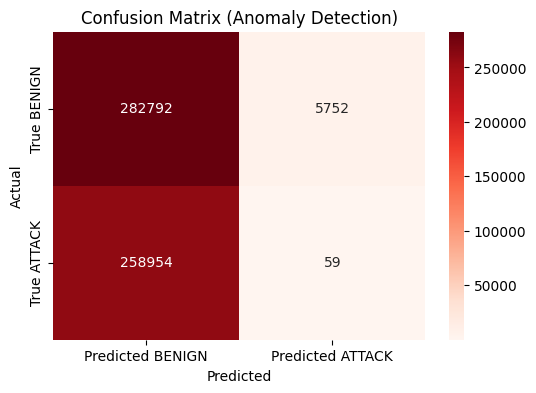

In [6]:
print("Classification Report (Unsupervised vs True Labels):")
print(classification_report(y, y_iso_pred, target_names=["BENIGN", "ATTACK"]))

cm = confusion_matrix(y, y_iso_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted BENIGN", "Predicted ATTACK"], yticklabels=["True BENIGN", "True ATTACK"])
plt.title("Confusion Matrix (Anomaly Detection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
joblib.dump(iso_model, "models/anomaly_model.pkl")
print("Anomaly model saved to models/anomaly_model.pkl")


Anomaly model saved to models/anomaly_model.pkl
